In [310]:
import fiona
import shapely.geometry 
import os
from shapely.geometry import shape, mapping, LineString, Polygon
import shapefile
import matplotlib.pyplot as plt
import utm
import  random

In [311]:
# Cargo y simplifico las estaciones.

estaciones = open('cr2_prDaily_2018_stations_ghcn.txt').read().split('\n')
print(estaciones[0])
estaciones = [estacion.split(',') for estacion in estaciones if len(estacion) >1]    
estaciones = [[estacion[0], float(estacion[5]), float(estacion[6])] for estacion in estaciones[1:]]


n =0
estacionesutm =[]
for estacion in estaciones:
    if float(estacion[1])>-80.0 and  float(estacion[2])>-180.00:   
        utmv = utm.from_latlon(estacion[1],estacion[2])
        estacionesutm.append([estacion[0],utmv[0],utmv[1],utmv[2],utmv[3]])

print(n)
    
#estacionesutm = []
#for estacion in estaciones:
 #   utmv =utm.from_latlon(estacion[1],estacion[2])
  #  estacionesutm.append([estaciones[0],utmv[0],utmv[1]])



codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones,inicio_automatica
0


In [312]:
estacionesutm

[['1000005', 448741.79364694085, 8054555.831648193, 19, 'K'],
 ['1200002', 423213.4508316477, 8034902.093206636, 19, 'K'],
 ['1200003', 425412.7714987545, 8027928.931628298, 19, 'K'],
 ['1201005', 425892.8509382446, 8027067.720230894, 19, 'K'],
 ['1201010', 430190.21801933105, 8010453.753751427, 19, 'K'],
 ['1201003', 432978.62412690924, 8009301.718835541, 19, 'K'],
 ['1001005', 478654.0062629971, 8003806.319276909, 19, 'K'],
 ['1110001', 421324.9152710566, 7990326.840077915, 19, 'K'],
 ['1202009', 446148.18378784, 7990168.099614458, 19, 'K'],
 ['1020014', 475380.7571709023, 7989485.8660935825, 19, 'K'],
 ['1020013', 477348.0502688656, 7989244.855053858, 19, 'K'],
 ['1020002', 474007.4462079123, 7988377.683218207, 19, 'K'],
 ['1202012', 440897.9944658512, 7988150.186051717, 19, 'K'],
 ['1202010', 440751.3640081159, 7987685.035344712, 19, 'K'],
 ['1020015', 471629.3926127596, 7987511.363284757, 19, 'K'],
 ['1020017', 471629.8457755993, 7987201.572899016, 19, 'K'],
 ['1202011', 446042.21

In [318]:
#cargo el archivo de limites y lo separo por region ( 0 a 15) 
fiona_collection = fiona.open('LIMITES_DPA_V02_WGS84_H19S.shp')
b = dict()
a = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.,9.0,10.0,11.0,12.0,13.0,14.0,15.0]
with fiona.open("LIMITES_DPA_V02_WGS84_H19S.shp") as input:
    meta = input.meta
    for n in a:
        try:
            os.mkdir(f"LIM{n:.0f}/")
        except:
            pass
        with fiona.open(f'LIM{n:.0f}/LIMITES_DPA_V02_WGS84_H19SR{n:.0f}.shp', 'w',**meta) as output:
            for feature in input:
                
                if feature['properties']['REGION'] in b.keys():
                    b[feature['properties']['REGION']]+=1
                else:
                    b[feature['properties']['REGION']] = 1
                
                if feature['properties']['REGION']== n:
                     output.write(feature)
print(b)
    

{12.0: 1792, 0.0: 4432, 11.0: 1472, 10.0: 3136, 14.0: 1120, 9.0: 2816, 8.0: 4272, 7.0: 2768, 6.0: 2432, 13.0: 3152, 5.0: 2080, 4.0: 1552, 3.0: 1264, 2.0: 1328, 1.0: 816, 15.0: 320}


In [319]:
# por region convierto las lineas en poligonsb
a = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.,9.0,10.0,11.0,12.0,13.0,14.0,15.0]
for n in a :

    file = f'LIM{n:.0f}/LIMITES_DPA_V02_WGS84_H19SR{n:.0f}.shp'
    try:
        os.mkdir(f'LIMP{n:.0f}/')
    except:
        pass
    output = f'LIMP{n:.0f}/PolyR{n:.0f}.shp'


    schema = {
        'geometry': 'Polygon',
        'properties' : {'id':'int'}
    }

    with fiona.open(file) as in_file, fiona.open(output, 'w', 'ESRI Shapefile', schema) as out_file:
        for index_line, row in enumerate(in_file):
            try:
                line = shape(row['geometry'])
                coordinates = []

                if isinstance(line, LineString):
                    for index, point in enumerate(line.coords):
                        if index == 0:
                            first_pt = point
                        coordinates.append(point)

                    coordinates.append(first_pt)
                    if len(coordinates) >= 3:

                        polygon = Polygon(coordinates)

                        out_file.write({
                            'geometry': mapping(polygon),
                            'properties': {'id': index_line},
                            })
            except:
                print(1)

                    
        

1
1
1
1
1


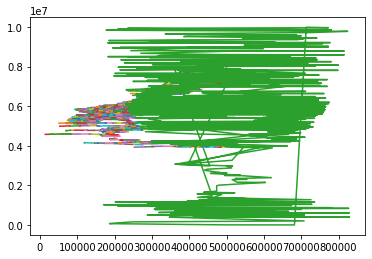

In [320]:
plt.figure
for n in a:
    sf = shapefile.Reader(f'LIM{n:.0f}/LIMITES_DPA_V02_WGS84_H19SR{n:.0f}.shp')
    #plt.figure()
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x,y)
        

x = [i[1] for i in estacionesutm]
y = [i[2] for i in estacionesutm]
plt.plot(x,y)
plt.show()
    


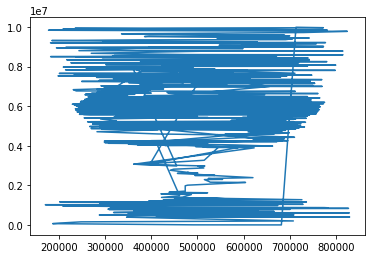

In [322]:
nen = []
x = []
y = []
for ne in estacionesutm[0:]:
    
    x.append(ne[1])
    y.append(ne[2])
    
    nens = []
    for n in a:
        #with fiona.open(f'LIMP{n:.0f}/PolyR{n:.0f}.shp') as fiona_collection:
        with fiona.open(f'LIM{n:.0f}/LIMITES_DPA_V02_WGS84_H19SR{n:.0f}.shp') as fiona_collection:

            shapefile_record = next(iter(fiona_collection))
            shape = shapely.geometry.asShape(shapefile_record['geometry'])
            point = shapely.geometry.Point(ne[1],ne[2])
            nens.append(point.distance(shape))
    nen.append(nens.index(min(nens)))
plt.plot(x,y)
plt.show()
nend = dict()
for neni in nen:
    if neni in nend.keys():
        nend[neni]+=1
    else:
        nend[neni]=1

In [323]:
estacionyreg = []
for i in range(len(nen)):
    estacionyreg.append([estacionesutm[i][0],nen[i]])

In [324]:

with open('estacionyreg.txt','w') as file:
    for a in  estacionyreg:
        b = str(a[0])+','+str(a[1])+'\n'
        file.write(b)
file.close()

In [325]:
print(nend)

{15: 120, 1: 75, 2: 77, 3: 71, 4: 119, 5: 60, 13: 61, 6: 143, 7: 73, 8: 5, 9: 97, 14: 22, 10: 24, 11: 74, 0: 14, 12: 209}
